# TEST MLP

/home/tianruiming/Eckart-Young-based-ML-Inference-framework/detection/DataGenerator.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model=torch.load(model_path)
/h

lr_update: 0
lr_update: 0.0002
lr_update: 0.00030000000000000003
lr_update: 0.0004
lr_update: 0.0005
lr_update: 0.0006000000000000001
lr_update: 0.0007000000000000001
lr_update: 0.0008000000000000001
lr_update: 0.0009000000000000002
lr_update: 0.0010000000000000002
lr_update: 0.0011000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_update: 0.0012000000000000003
lr_updat

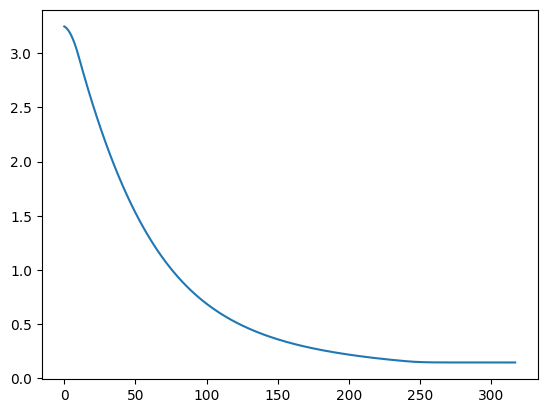

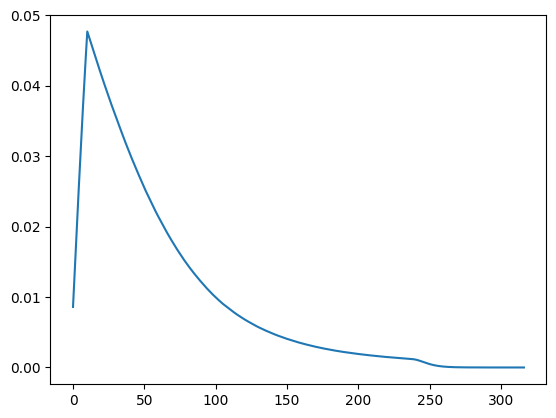

/home/tianruiming/Eckart-Young-based-ML-Inference-framework/detection/SVD.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model=torch.load(model_path)


In [1]:
from detection.SVD import SVD
from detection.DataGenerator import train_based_self_detection
model_path='./model/mlp.pth'
device='cuda:1'
dataloader=train_based_self_detection(model_path,1,300,device)
data,output_label,label=dataloader.make_data_pid(10000,1,28,28,10,30,5000)
# data,output_label,label=dataloader.make_data(10000,1,28,28,10,30,5000)
dataloader.show_loss()
svder=SVD(model_path,device)


0.14480705559253693
0.1465148627758026
0.14799797534942627
0.1494700163602829
0.15100938081741333
0.15270699560642242
0.15439145267009735
0.15603706240653992
0.15791665017604828
0.1599564254283905
0.16238683462142944
0.16462701559066772
0.1669922024011612
0.16924653947353363
0.1722240447998047
0.17513951659202576
0.17827555537223816
0.18167980015277863
0.18542027473449707
0.18880288302898407
0.19294562935829163
0.19742463529109955
0.20166116952896118
0.20684555172920227
0.21168175339698792
0.2168496549129486
0.22150932252407074
0.22768773138523102
0.23342961072921753
0.23989364504814148
0.2466520518064499
0.2542155086994171
0.26119643449783325
0.269667387008667
0.2785612642765045
0.2876591682434082
0.2975015938282013
0.30839911103248596
0.3178183138370514
0.3292366862297058
0.34127163887023926
0.35321301221847534
0.36669206619262695
0.3793185353279114
0.39116790890693665
0.40666550397872925
0.4214917719364166
0.43961140513420105
0.4576168954372406
0.4744238555431366
0.4957415759563446


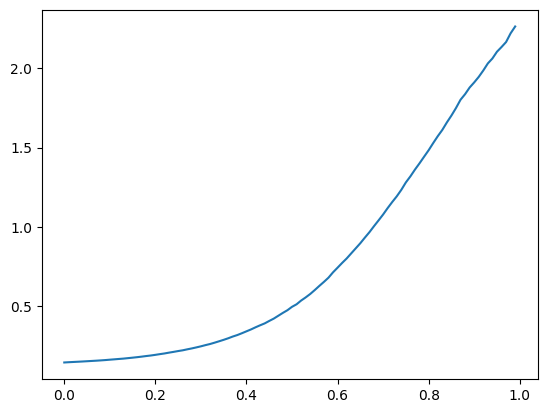

In [2]:
import numpy as np
loss_list=[]
for i in np.arange(0,1,0.01):
    model=svder.based_on_reduce_rate(i,2,0)
    loss=svder.loss_evaluation(model,data,output_label)
    print(loss)
    loss_list.append(loss)
from matplotlib import pyplot as plt
plt.plot(np.arange(0,1,0.01),loss_list)
plt.show()


0.9992
0.9991
0.9989
0.9985
0.9979
0.9967
0.9952
0.993
0.9885
0.9789
0.958
0.9256
0.8708
0.7986
0.72
0.6268
0.5233
0.4233
0.3341
0.2463
0.0996
0.0996


/home/tianruiming/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


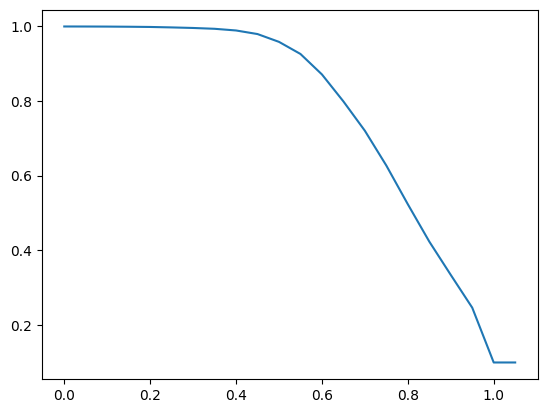

In [3]:
import numpy as np
loss_list=[]
for i in np.arange(0,1.1,0.05):
    model=svder.based_on_reduce_rate(i,0,0,1)
    acc=svder.acc_evaluation(model,data,label)
    print(acc)
    loss_list.append(acc)
from matplotlib import pyplot as plt
plt.plot(np.arange(0,1.1,0.05),loss_list)
plt.show()


In [4]:
from detection.Searcher import Recrusively_reduce_search
searcher=Recrusively_reduce_search(model_path,data,output_label,label,device)
acc_data=[]
loss_data=[]
searcher.search(1,0.2,[],acc_data,loss_data)
print(acc_data)
for i in loss_data:
    print(i)
print(loss_data)
print(searcher.acc_type)

/home/tianruiming/Eckart-Young-based-ML-Inference-framework/detection/Searcher.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model=torch.load(model_path)


[np.float64(1.0), np.float64(1.0)]
[np.float64(1.0), np.float64(0.8)]
[np.float64(1.0), np.float64(0.6000000000000001)]
[np.float64(1.0), np.float64(0.40000000000000013)]
[np.float64(1.0), np.float64(0.20000000000000018)]
[np.float64(1.0), np.float64(2.220446049250313e-16)]
[np.float64(0.8), np.float64(1.0)]
[np.float64(0.8), np.float64(0.8)]
[np.float64(0.8), np.float64(0.6000000000000001)]
[np.float64(0.8), np.float64(0.40000000000000013)]
[np.float64(0.8), np.float64(0.20000000000000018)]
[np.float64(0.8), np.float64(2.220446049250313e-16)]
[np.float64(0.6000000000000001), np.float64(1.0)]
[np.float64(0.6000000000000001), np.float64(0.8)]
[np.float64(0.6000000000000001), np.float64(0.6000000000000001)]
[np.float64(0.6000000000000001), np.float64(0.40000000000000013)]
[np.float64(0.6000000000000001), np.float64(0.20000000000000018)]
[np.float64(0.6000000000000001), np.float64(2.220446049250313e-16)]
[np.float64(0.40000000000000013), np.float64(1.0)]
[np.float64(0.40000000000000013), 

    reduce_of_layer_0  reduce_of_layer_1
0        1.000000e+00       1.000000e+00
1        1.000000e+00       8.000000e-01
2        1.000000e+00       6.000000e-01
3        1.000000e+00       4.000000e-01
4        1.000000e+00       2.000000e-01
5        1.000000e+00       2.220446e-16
6        8.000000e-01       1.000000e+00
7        8.000000e-01       8.000000e-01
8        8.000000e-01       6.000000e-01
9        8.000000e-01       4.000000e-01
10       8.000000e-01       2.000000e-01
11       8.000000e-01       2.220446e-16
12       6.000000e-01       1.000000e+00
13       6.000000e-01       8.000000e-01
14       6.000000e-01       6.000000e-01
15       6.000000e-01       4.000000e-01
16       6.000000e-01       2.000000e-01
17       6.000000e-01       2.220446e-16
18       4.000000e-01       1.000000e+00
19       4.000000e-01       8.000000e-01
20       4.000000e-01       6.000000e-01
21       4.000000e-01       4.000000e-01
22       4.000000e-01       2.000000e-01
23       4.00000

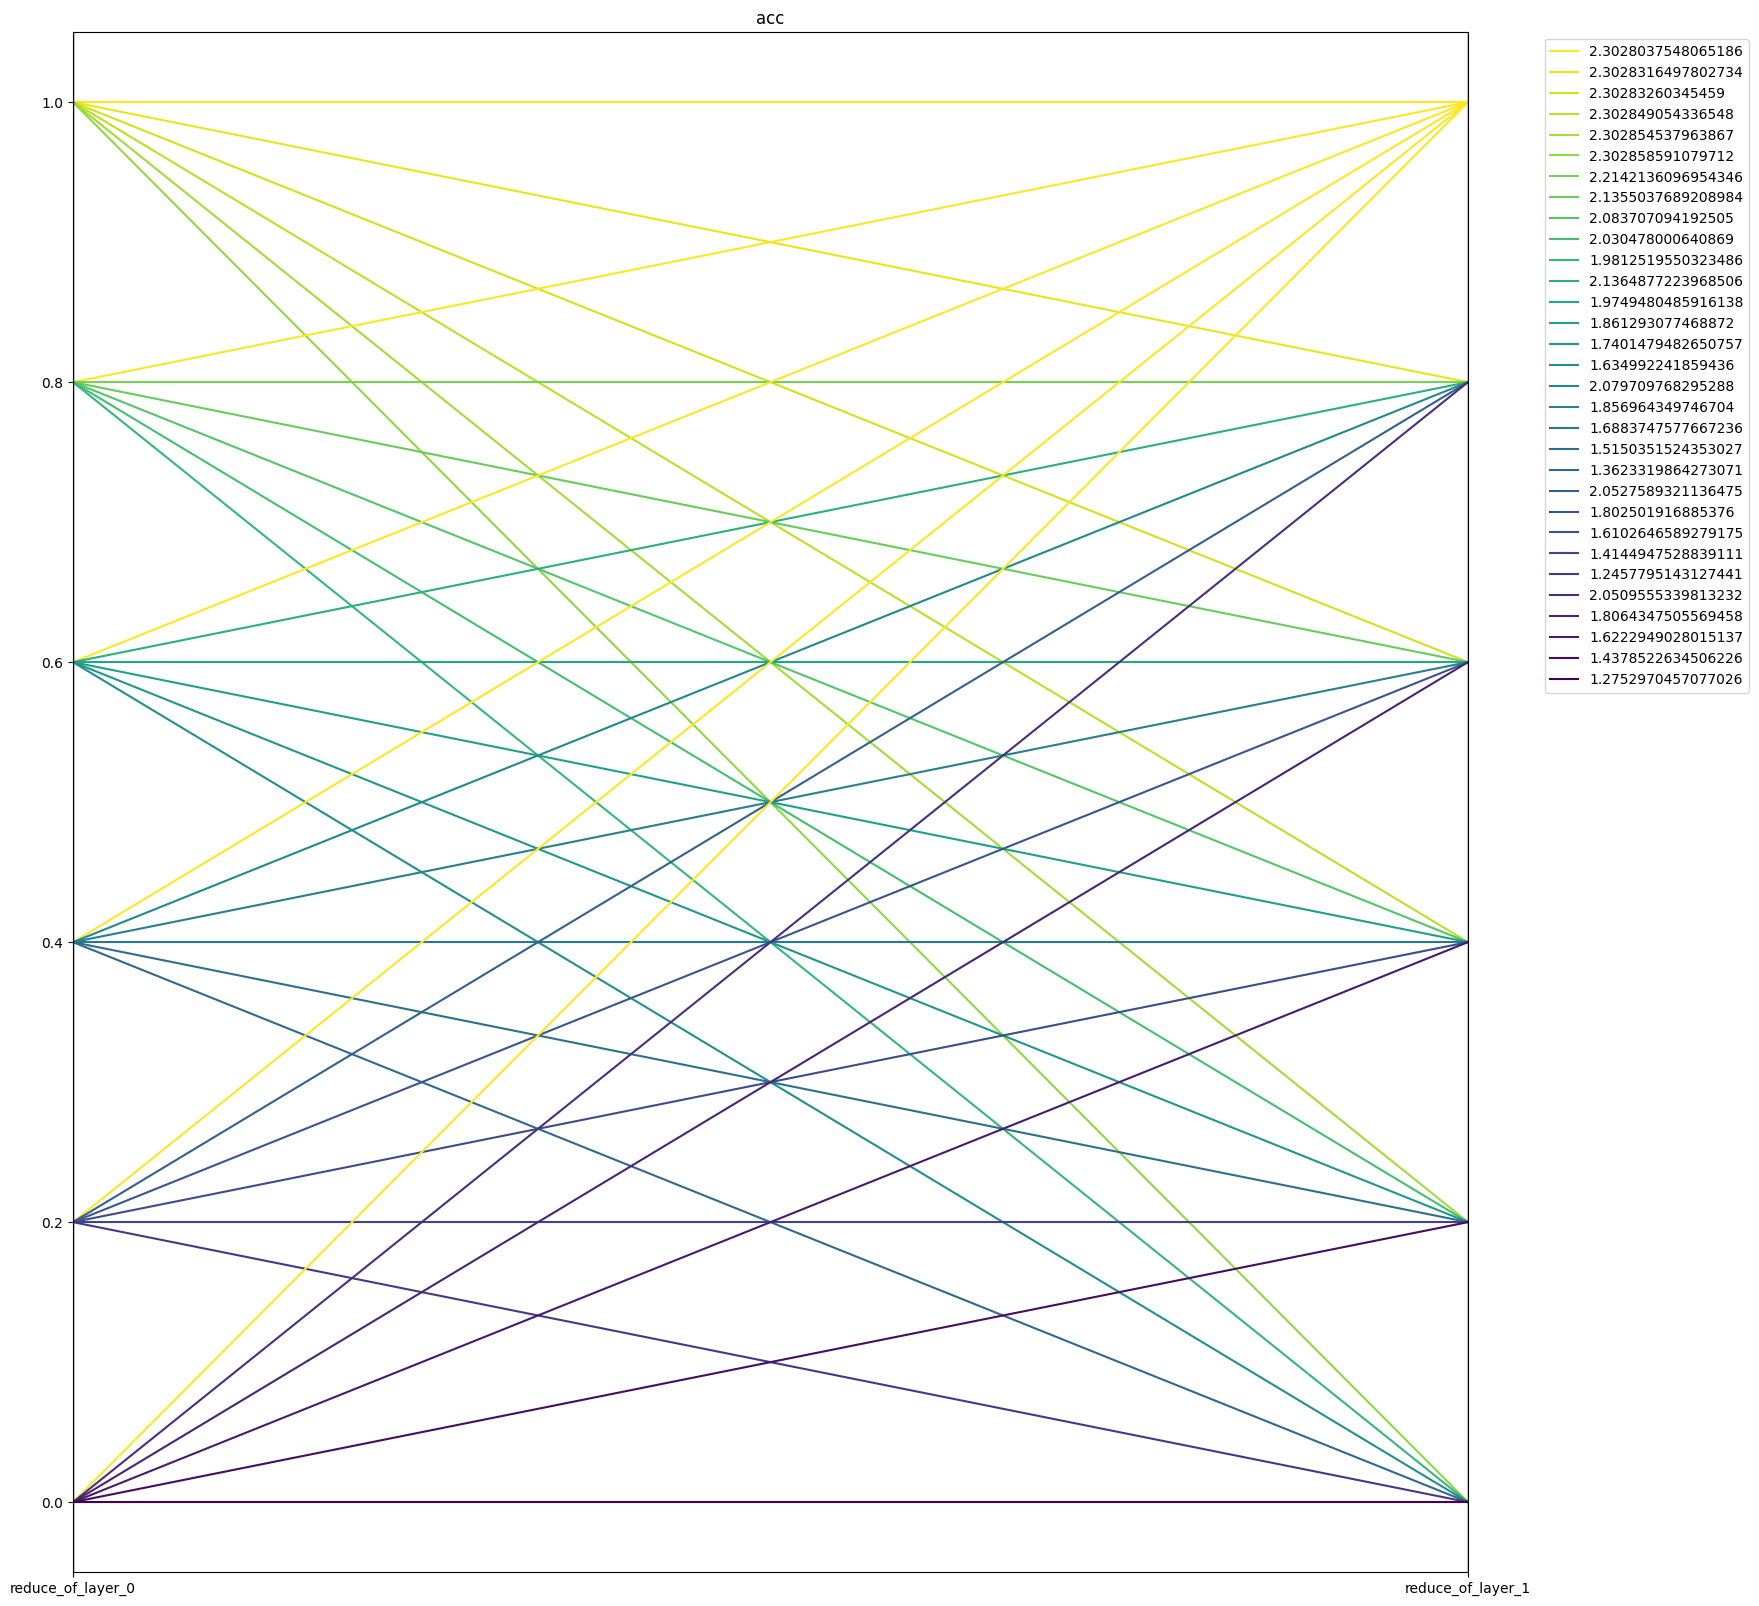

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from matplotlib.colors import ListedColormap
df = pd.DataFrame(loss_data, columns=['features','acc'])
features_df = pd.DataFrame(df['features'].tolist(), columns=[f'reduce_of_layer_{i}' for i in range(len(df['features'][0]))])
df = pd.concat([df['acc'], features_df], axis=1)
# features_df.insert(0, 'acc', df['acc'])
# features_df.insert(2, 'index', features_df.index)
print(features_df)
# 绘制平行坐标图
cmap = plt.get_cmap('viridis')
reversed_cmap = ListedColormap(cmap.colors[::-1])
plt.figure(figsize=(18, 20))
parallel_coordinates(df, 'acc', colormap=reversed_cmap,use_columns=False)
# parallel_coordinates(features_df, 'index', colormap=reversed_cmap,use_columns=False)
plt.title('acc')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

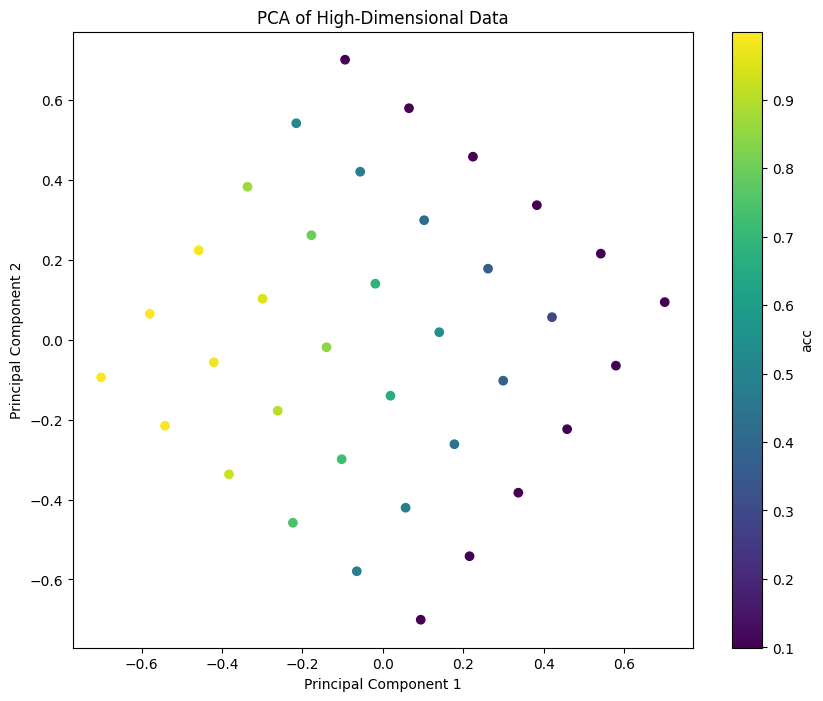

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 示例数据

# 将数据转换为 DataFrame
df = pd.DataFrame(acc_data, columns=['features', 'acc'])
features_df = pd.DataFrame(df['features'].tolist(), columns=[f'feature_{i}' for i in range(len(df['features'][0]))])

# 使用 PCA 将数据降维到2维
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_df)

# 绘制散点图
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=df['acc'], cmap='viridis')
plt.colorbar(scatter, label='acc')
plt.title('PCA of High-Dimensional Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

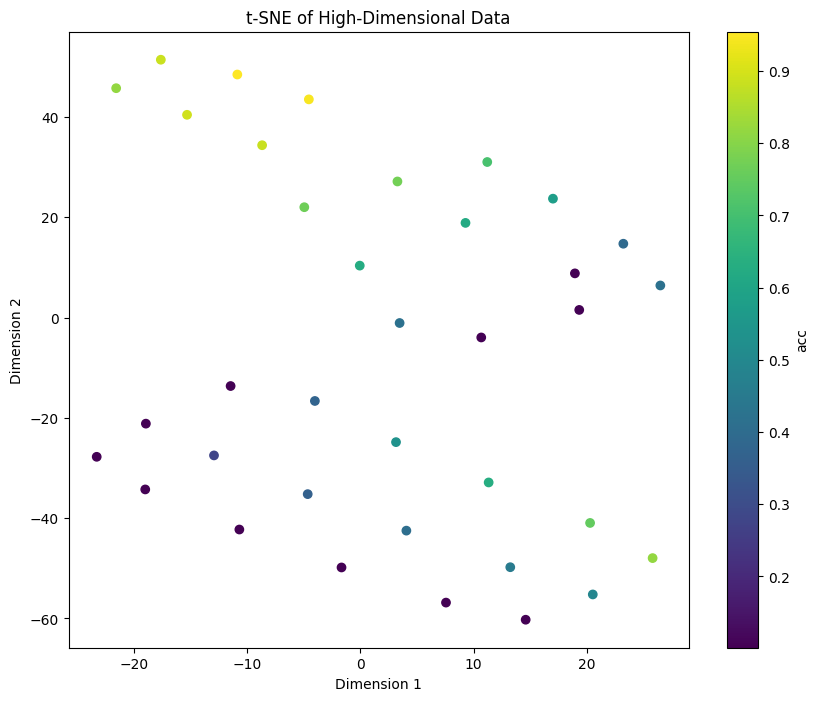

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 示例数据


# 将数据转换为 DataFrame
df = pd.DataFrame(acc_data, columns=['features', 'acc'])
features_df = pd.DataFrame(df['features'].tolist(), columns=[f'feature_{i}' for i in range(len(df['features'][0]))])

# 使用 t-SNE 将数据降维到2维
tsne = TSNE(perplexity=min(3,len(acc_data)-1),n_components=2, random_state=0)
features_2d = tsne.fit_transform(features_df)

# 绘制散点图
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=df['acc'], cmap='viridis')
plt.colorbar(scatter, label='acc')
plt.title('t-SNE of High-Dimensional Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# TEST Conv

100%|██████████| 400/400 [00:04<00:00, 82.27it/s] 


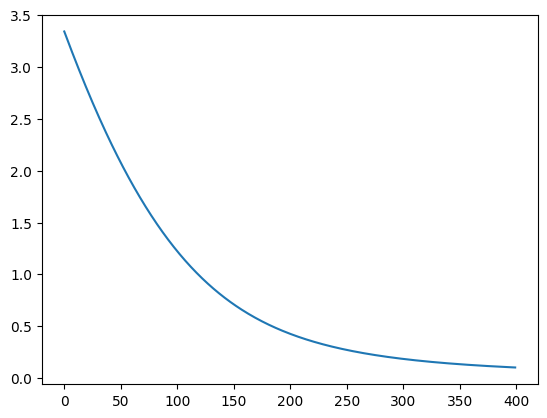

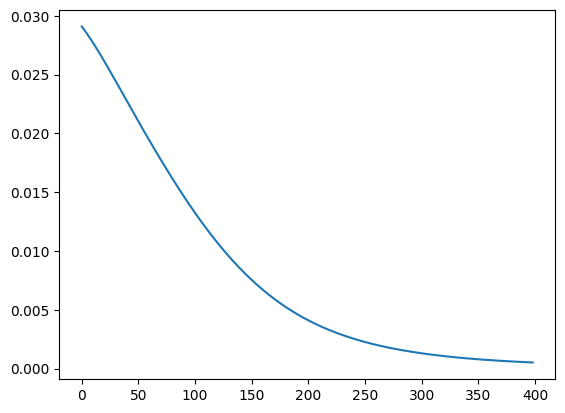

In [6]:
from detection.SVD import SVD
from detection.DataGenerator import train_based_self_detection
model_path='./model/conv.pth'
device='cuda:1'
dataloader=train_based_self_detection(model_path,1e-3,400,device)
data,output_label,label=dataloader.make_data(100,1,28,28,10,30,5000)
dataloader.show_loss()
svder=SVD(model_path,device)


Linear
0.9190376996994019
Linear
0.9129295945167542
Linear
0.9076327681541443
Linear
0.9018601179122925
Linear
0.8967435359954834
Linear
0.8918917775154114
Linear
0.8868286609649658
Linear
0.8820862174034119
Linear
0.8785428404808044
Linear
0.8751991987228394
Linear
0.8727360963821411
Linear
0.8707122802734375
Linear
0.868910551071167
Linear
0.8667231202125549
Linear
0.8647884726524353
Linear
0.8637695908546448
Linear
0.8649688959121704
Linear
0.8655481934547424
Linear
0.8676460981369019
Linear
0.8679702877998352
Linear
0.869398832321167
Linear
0.8730021119117737
Linear
0.8730210661888123
Linear
0.876788854598999
Linear
0.8805118799209595
Linear
0.8850757479667664
Linear
0.8897402882575989
Linear
0.8941358923912048
Linear
0.8987525105476379
Linear
0.9058111310005188
Linear
0.9109731912612915
Linear
0.9182828664779663
Linear
0.9258876442909241
Linear
0.9324639439582825
Linear
0.9415035843849182
Linear
0.9520074725151062
Linear
0.9617995619773865
Linear
0.9730567932128906
Linear
0.981004

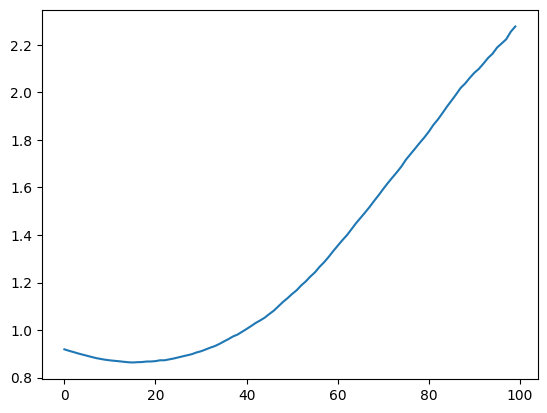

In [6]:
import numpy as np
loss_list=[]
for i in np.arange(0,1,0.01):
    model=svder.based_on_reduce_rate(reduce_rate=i,
                                     reduce_bound_of_layer_conv=3,
                                     reduce_bound_of_layer_Linear=0)
    loss=svder.loss_evaluation(model,data,output_label)
    # if(loss_list and loss==loss_list[-1]):
    #     continue
    print(loss)
    loss_list.append(loss)
from matplotlib import pyplot as plt
plt.plot(loss_list)
plt.show()


Linear
0.9176
Linear
0.9231
Linear
0.9279
Linear
0.9322
Linear
0.9368
Linear
0.9382
Linear
0.9446
Linear
0.947
Linear
0.9498
Linear
0.9541
Linear
0.9564
Linear
0.958
Linear
0.959
Linear
0.9593
Linear
0.9608
Linear
0.9642
Linear
0.9655
Linear
0.9653
Linear
0.968
Linear
0.9692
Linear
0.9703
Linear
0.9709
Linear
0.972
Linear
0.9721
Linear
0.9735
Linear
0.9732
Linear
0.9738
Linear
0.9724
Linear
0.9731
Linear
0.9736
Linear
0.9749
Linear
0.9734
Linear
0.9722
Linear
0.974
Linear
0.9728
Linear
0.9712
Linear
0.9719
Linear
0.9684
Linear
0.9681
Linear
0.9657
Linear
0.9638
Linear
0.9614
Linear
0.9584
Linear
0.9564
Linear
0.9567
Linear
0.9554
Linear
0.9495
Linear
0.9501
Linear
0.9423
Linear
0.9349
Linear
0.931
Linear
0.9268
Linear
0.9229
Linear
0.9152
Linear
0.9095
Linear
0.9033
Linear
0.8929
Linear
0.8867
Linear
0.8778
Linear
0.8652
Linear
0.853
Linear
0.8466
Linear
0.835
Linear
0.8235
Linear
0.8079
Linear
0.7946
Linear
0.7822
Linear
0.7674
Linear
0.7477
Linear
0.7344
Linear
0.7128
Linear
0.6968
L

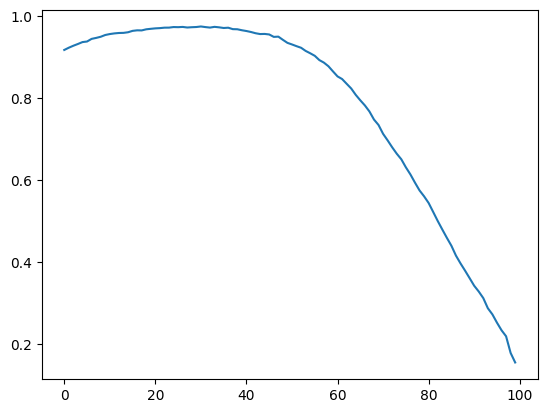

In [7]:
import numpy as np
loss_list=[]
for i in np.arange(0,1,0.01):
    model=svder.based_on_reduce_rate(reduce_rate=i,
                                     reduce_bound_of_layer_conv=0,
                                     reduce_bound_of_layer_Linear=0)
    acc=svder.acc_evaluation(model,data,label)
    if(loss_list and acc==loss_list[-1]):
        continue
    print(acc)
    loss_list.append(acc)
from matplotlib import pyplot as plt
plt.plot(loss_list)
plt.show()


In [35]:
import torch
tensor=torch.randn(6,2,28,28)

conv=torch.nn.Conv2d(2,16,(3,3))
input_unfold=torch.nn.Unfold(
    kernel_size=conv.kernel_size,
    padding=conv.padding,
    stride=conv.stride
)

print("input")
print(tensor.shape)
print()

print("conv")
print(conv.weight.shape)
print()

print("input_unfold")
vu=input_unfold(tensor)
# vuu=vu.view(input_unfold.shape[0],input_unfold.shape[2],input_unfold.shape[1])
vuu=vu.permute(0,2,1)
print(vuu.shape)
# print(input_unfold(tensor).shape)

weight=conv.weight.view(conv.out_channels,-1)
print("weight")
print(weight.shape)

linear=torch.nn.Linear(weight.shape[1],weight.shape[0])
linear.weight=torch.nn.Parameter(weight)

out=linear(vuu)

print("out")
print(out.shape)

out=out.permute(0,2,1)
print(out.shape)

output_H=int((tensor.shape[2]+2*conv.padding[0]-conv.kernel_size[0])/conv.stride[0])+1
output_W=int((tensor.shape[3]+2*conv.padding[1]-conv.kernel_size[1])/conv.stride[1])+1
output=out.view(out.shape[0],out.shape[1],output_H,output_W)

print(output.shape)

input
torch.Size([6, 2, 28, 28])

conv
torch.Size([16, 2, 3, 3])

input_unfold
torch.Size([6, 676, 18])
weight
torch.Size([16, 18])
out
torch.Size([6, 676, 16])
torch.Size([6, 16, 676])
torch.Size([6, 16, 26, 26])
